<a href="https://colab.research.google.com/github/joanjn/Data-Analytics-/blob/main/Final_Capstone_3_JN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Question: Does e-commerce sales and profits differ by locations in US markets in 2020 during the covid-19? 

Research Question: Is there a difference in relationship that exists between e-commerce sales and profit in different US regions during the 2020 covid-19?

Null Hypothesis: There is no difference in relationship that exists between e-commerce sales and profits in different US regions during the 2020 covid-19 

Alternative Hypothesis: There is a difference in relationship that exists between e-commerce sales and profits in different US regions during the 2020 covid-19


Solution: 
1. Downloaded CSV files US e-commerce dataset and usa_county_wise coronavirus report from Kaggle.com

2. Extract the coronavirus report by date using Datetime. This dataframe contains 14 columns and 627,921 rows

3. Downloaded US e-commerce sales and profits since the coronavirus began in 2020. This dataframe is made up of 19 columns and 3,313 rows with characters, integers, floating point numbers, and date variables.

4. Calculated Descriptive statistics to better understand the nature of the variables and how they are distributed

5. To answer the research question and hypothesis, Pearson Correlation was used to analyze correlations that exist between Sales and Profit in the e-commerce. This will help find out if there is any linear or direct relationship that exists between the two columns and if they are statistically significant.

6. Additional correlations was performed to calculate the relationship that exists between covid-19 confirmed cases and deaths and how statistically significant is the relationship for more insights. 

7. Ran these additional correlations tests on confirmed and deaths and other columns to uncover possible further findings. 

8. Using data visualizations, calculated histogram of covid-19 confirmed , covid-19 deaths, and ecommerce Sales and Profits cases, 

9. Since the p values was determined using Pearson correlations, z test is not needed for this study.


**Kaggle Datasets Used for Analysis includes **

1. The US_county_wise_coronavirus report:  https://www.kaggle.com/imdevskp/corona-virus-report/data


2. US_e_commerce_record 2020 :  https://www.kaggle.com/ammaraahmad/us-ecommerce-record-2020

# Import Libraries



In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns  # used for visualizations
import io  

# Upload CSV File From Local Drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving usa_county_wise.csv to usa_county_wise (2).csv


In [ ]:
# Keep the data in a pandas dataframe
import pandas as pd
import io
  
county_covid_df = pd.read_csv(io.BytesIO(uploaded['usa_county_wise.csv']))

In [ ]:
# Get the first number of rows 
county_covid_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [ ]:
# To see all the objects and variables in this dataframe
print(county_covid_df)

             UID iso2 iso3  ...     Date  Confirmed Deaths
0             16   AS  ASM  ...  1/22/20          0      0
1            316   GU  GUM  ...  1/22/20          0      0
2            580   MP  MNP  ...  1/22/20          0      0
3       63072001   PR  PRI  ...  1/22/20          0      0
4       63072003   PR  PRI  ...  1/22/20          0      0
...          ...  ...  ...  ...      ...        ...    ...
627915  84070016   US  USA  ...  7/27/20        347      1
627916  84070017   US  USA  ...  7/27/20         70      0
627917  84070018   US  USA  ...  7/27/20       2781     23
627918  84070019   US  USA  ...  7/27/20        142      0
627919  84070020   US  USA  ...  7/27/20       2375     24

[627920 rows x 14 columns]


In [ ]:
county_covid_df.info()  # Detailed picture of the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [ ]:
# Let's covert date to an object using datetime library
county_covid_df['Date'] = pd.to_datetime(county_covid_df.Date)


In [ ]:
# checking for nulls so integers can be summed
county_covid_df.isnull().sum()

UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64

In [ ]:
covid_data = county_covid_df[["Province_State", "Date", "Confirmed", "Deaths"]]    # create a new dataframe to grasp the integers

In [ ]:
covid_data.head()

,Province_State,Date,Confirmed,Deaths
0,American Samoa,2020-01-22,0,0
1,Guam,2020-01-22,0,0
2,Northern Mariana Islands,2020-01-22,0,0
3,Puerto Rico,2020-01-22,0,0
4,Puerto Rico,2020-01-22,0,0


In [ ]:
# Another way to clean the data using datetime,lets select Province_State, Confirmed, and Deaths by date
# Select Confirmed, Deaths and Revovered columns by date
county_covid_df = county_covid_df.groupby('Date')[ 'Province_State', 'Confirmed', 'Deaths'].sum().sort_values('Date', ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
covid_data.head()

,Province_State,Date,Confirmed,Deaths
0,American Samoa,2020-01-22,0,0
1,Guam,2020-01-22,0,0
2,Northern Mariana Islands,2020-01-22,0,0
3,Puerto Rico,2020-01-22,0,0
4,Puerto Rico,2020-01-22,0,0


In [ ]:
#Perform descriptive summary to understand the nature of the variables, presents data in a more meaningful way  to know what happened.
# Confirmed covid-19 cases has a higher mean of 357.28 than covid reported deaths with a mean of 17.54
covid_data.describe()          

,Confirmed,Deaths
count,627920.000000,627920.000000
mean,357.284285,17.536328
std,3487.282694,300.991466
min,0.000000,0.000000
25%,0.000000,0.000000
50%,4.000000,0.000000
75%,63.000000,1.000000
max,224051.000000,23500.000000


**Data Visualizations**


# sort the variable by "Confirmed" cases in US counties, so that it is easy to see which State has the highest confirmed cases of covid-19

In [ ]:
covid_data.sort_values(by = "Confirmed", ascending = False, inplace = True) 

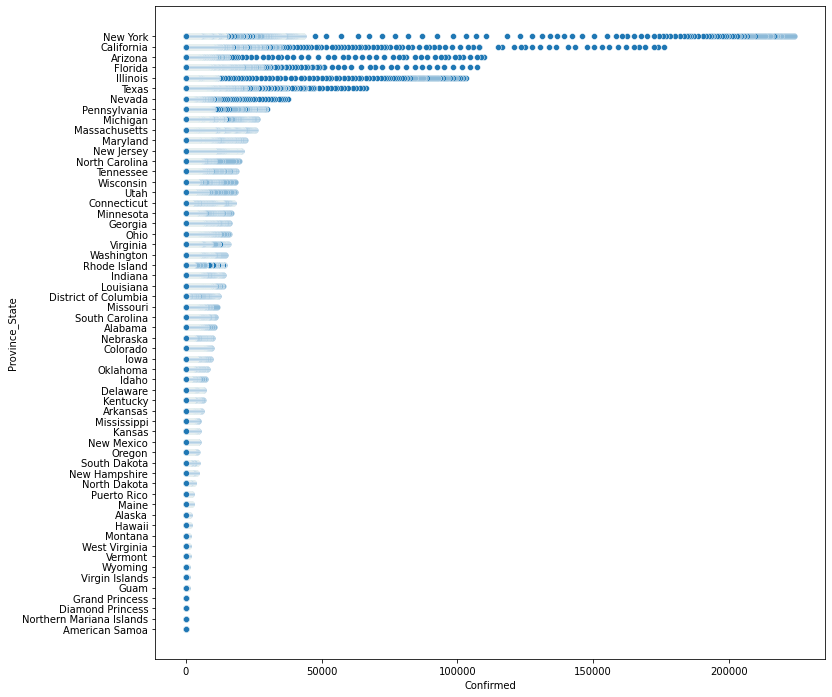

In [ ]:
# comparing two variables "Province_State" and Confirmed Covid-19 cases to see if there is any trend.

plt.figure(figsize = (12,12))
sns.scatterplot(x = covid_data["Confirmed"], y = covid_data["Province_State"])


## The scatterplot shows that NewYork leads every other State in the number of Covid-19 confirmed cases, followed by California. The top 5 states having a largest number of confirmed covid-19 cases are:-`

1> New York 2> California 3> Arizona 4> Florida 5> Illinois

```


In [ ]:
  stats.pearsonr(covid_data['Confirmed'], covid_data['Deaths'])#  Correlationa to see is a relationship exists and to see how statistically significant 

(0.8986287883215315, 0.0)

# There is a correlation between confirmed covid-19 cases and deaths. There is a strong statistically significant relationship that exists between covid-19 confirmed cases and the number of deaths in 2020. The p value is less than 0.05 and confirms this. The correlation value of 0.8 is close to 1 showing how strong the linear relationship is. This correlation was done to uncover additional insights.

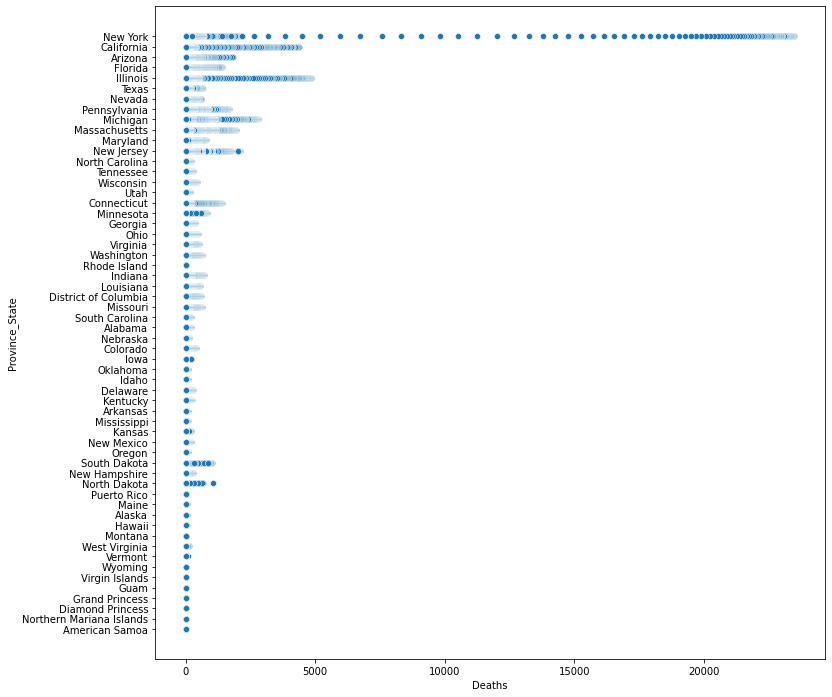

In [ ]:
# Comparing Covid-19 deaths and Province_State to see how they correlated

plt.figure(figsize = (12,12))
sns.scatterplot(x = covid_data["Deaths"], y = covid_data["Province_State"])



# **Top 5 states having a largest number of deaths during covid-19 are:

1> New York 2> Illinois 3> California 4> Michigan 5> New Jersey 

```



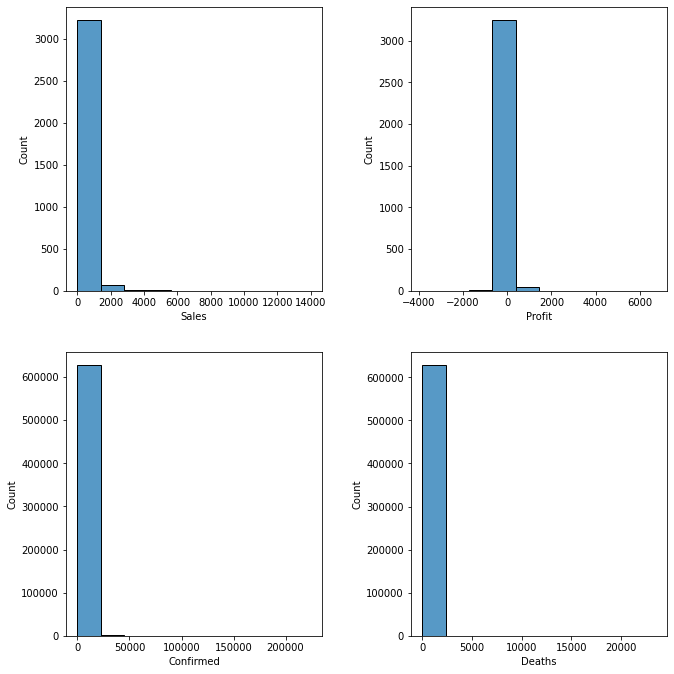

In [ ]:
# The paired histogram distribution of the 4 variables ( Sales, Profit, Confirmed covid-19 cases, and Deaths are shown below)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(data = data, x = "Sales", bins=10)
plt.subplot(2,2,2)
sns.histplot(data = data, x = "Profit", bins=10)
plt.subplot(2,2,3)
sns.histplot(data = covid_data, x = "Confirmed", bins=10)
plt.subplot(2,2,4)
sns.histplot(data = covid_data, x = "Deaths", bins=10)
plt.tight_layout(pad = 3)

In the above histogram we can observe that:-

1> The major sales happenned in the range of amount between 0 to 1000.

2> The major profits comes between -500 to +500.

3> The major confirmed cases comes between 0 to 20000.

4> The major Death cases comes between 0 to 2000.

# **Importing US E_Commerce Dataset**

```



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving US _E_commerce records.csv to US _E_commerce records.csv


In [ ]:
import pandas as pd  # Convert imported US E_Commerce data into pandas dataframe
import io
  
usa_df = pd.read_csv(io.BytesIO(uploaded['US _E_commerce records.csv']), encoding= 'unicode_escape')

In [ ]:
usa_df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
usa_df.shape  # Examine the dataframe

(3312, 19)

In [ ]:
usa_df.info()  # to see the details of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [ ]:
usa_df.isnull().sum()  # Find out how many are not nu//l

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
data = usa_df[["Order Date", "State", "Region", "Category", "Sales", "Quantity", "Profit"]]  # create a new dataframe to grasp the integers

In [ ]:
data.head() # Create a subset of the variable

,Order Date,State,Region,Category,Sales,Quantity,Profit
0,01-01-20,Ohio,East,Furniture,48.896,4,8.5568
1,01-01-20,California,West,Furniture,474.430,11,199.2606
2,01-01-20,Wisconsin,Central,Office Supplies,3.600,2,1.7280
3,01-01-20,Texas,Central,Office Supplies,454.560,5,-107.9580
4,01-01-20,Texas,Central,Furniture,141.420,5,-187.3815


In [ ]:
# Perform Descriptive statistics to understand the numeric variables

data[['Sales', 'Quantity', 'Profit']].describe()

,Sales,Quantity,Profit
count,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,28.212340
std,585.257531,2.221776,241.864342
min,0.444000,1.000000,-3839.990400
25%,17.018000,2.000000,1.763200
50%,53.810000,3.000000,8.296800
75%,205.105700,5.000000,28.315125
max,13999.960000,14.000000,6719.980800


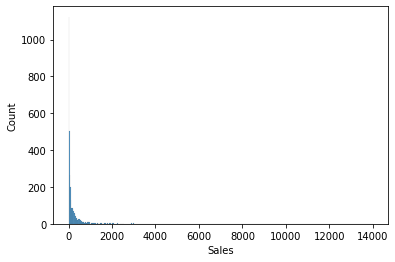

In [ ]:
# Perform histogram to see if the values are normally distributed


ax = sns.histplot(data['Sales'])                      Negative skew with a shift to the left

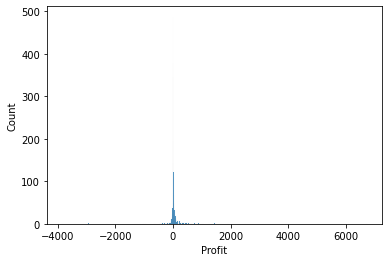

In [ ]:

ax = sns.histplot(data['Profit'])                  # Assume normal distribution

# ###** Correlations - To answer the research  question and hypothesis and see if there is a linear relationship between two columns (Sales and Profit in 2020) and determine how significant they are, a Peasonr correlation was done** **

# Using the Pearson Correlation, we can find out the correlation and the p-value to see if the correlation is significant or not. The Pearson correlation further indicates this study is testing the likelihood that this linear relatinship exists in the overall population.

In [ ]:
stats.pearsonr (data['Sales'], data['Profit']) 

(0.5323122089586778, 8.758880906073477e-242)

### The correlation of 0.5 is not so close to 1, indicating that a moderate relationship exists between Sales and Profts in US E-commerce in 2020. The p value is less than alpha 0.05 , indicating that there is also a significant  relationship between Sales and Profit.

# Reject the null hypothesis: There is no difference in relationship that exists between e-commerce sales and profits in different US regions during the 2020 covid-19 


In [ ]:
data.sort_values(by = "Profit", ascending = False, inplace = True)  # To evaluate the correlation between profit and the State that made more than others.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


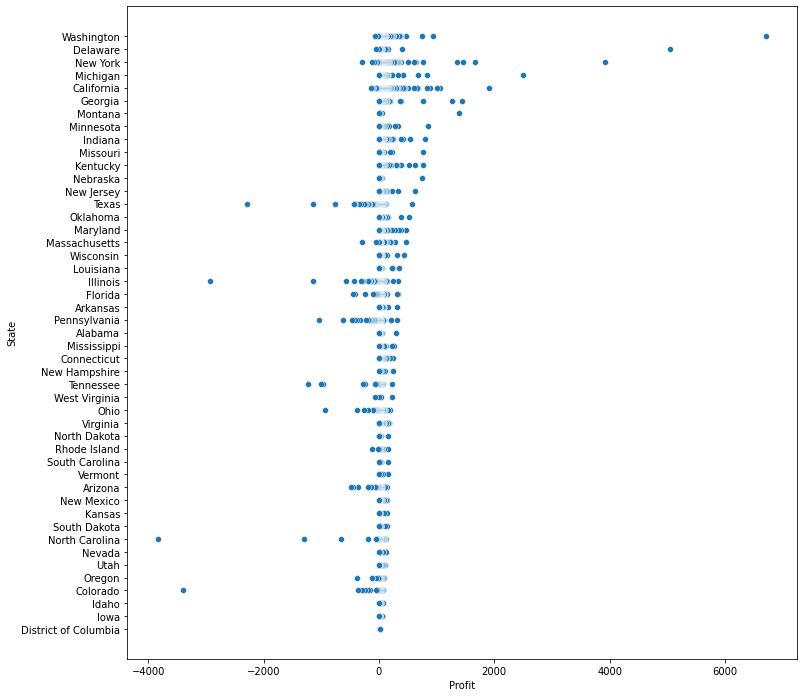

In [ ]:
plt.figure(figsize = (12,12))
sns.scatterplot(x = data["Profit"], y = data["State"])

### The above scatter plot shows the trend in relationship of how profit margins differ at different location in US Market in 2020 during covid-19. The top states with best profits are:-

## 1> Washington 2> Delaware 3> New York 4> Michigan 5> California

In [ ]:
# To find the relationship that exists between E-commerce sales in 2020 and COVID-19, we will sort the values by Sales

data.sort_values(by = "Sales", ascending = False, inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


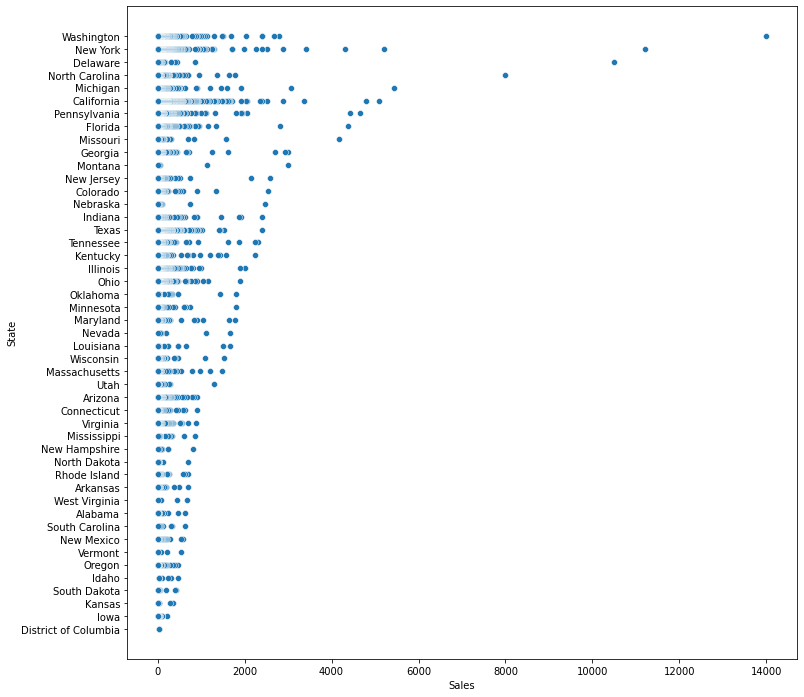

In [ ]:
plt.figure(figsize = (12,12))
sns.scatterplot(x = data["Sales"], y = data["State"])

### Here we can see sales varie from location to location in the US Market in 2020 Covid-19 ecommerce. The top best states which drives most of the sales are :-

1> Washington 2> New York 3> Delaware 4> North Carolina 5> Michigan

The p-value is less than 0.05 so we reject the null hypothesis and conclude that there is a significant relationship that exits between e-commrce sales and profits in different US regions during the 2020 Covid-19



## The correlation between sales and profit is 0.53 which states that both profit and sales are weak but moderately correlated to the US covid-19 reports in 2020. In addition, there is a difference in the profit and sales of e-commerce in different States and can be observed in the scatterplot. For example, North Carolin have high sales but low profits, where as we can see that California is having high profit margin but low sales. 
##
# Using the Pearson Correlation, this study shows that the although there is a moderate linear relationship that exists between Sales and Profit in various US counties, the p-value is less than 0.05, meaning that this linear relationship is also statistically significant. As a result, we reject the null hypothesis that there is no difference in relationship that exists between ecommerce sales and profits in different US regions during the 2020 covid-19. 


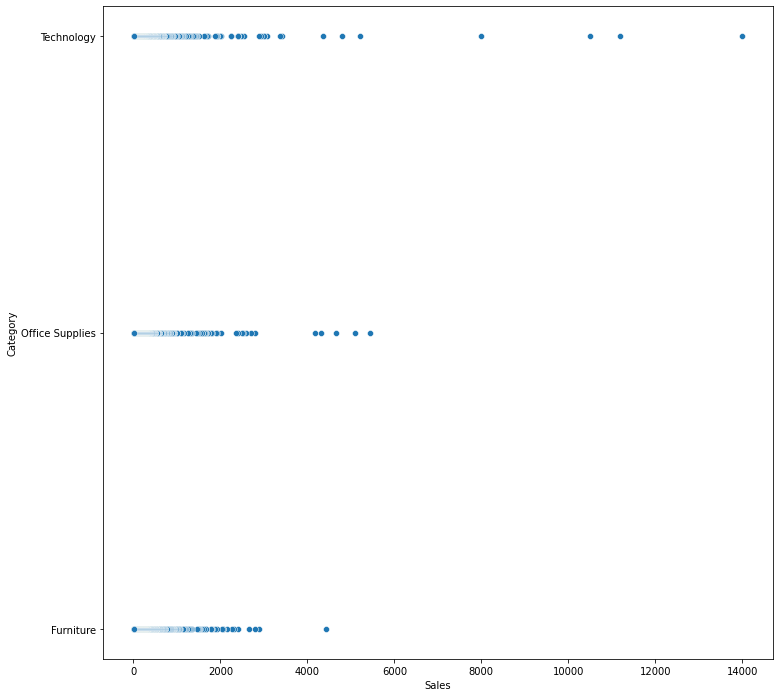

In [ ]:
# To find out which category of product was driving up Sales of e-commerce, a correlation between Sales and Category was performed

plt.figure(figsize = (12,12))
sns.scatterplot(x = data["Sales"], y = data["Category"])

# The categories which drives the sales was Technology and office supplies.

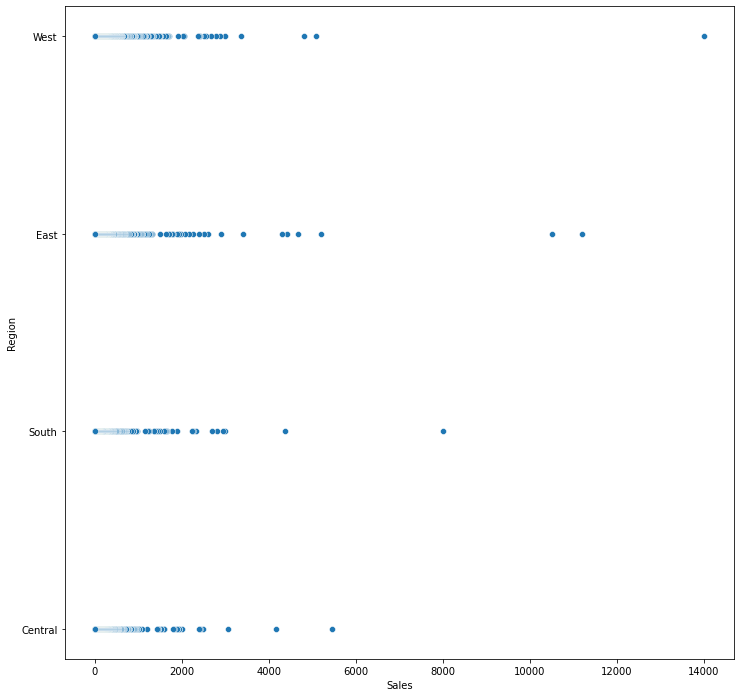

In [ ]:
# To find out which region in US county has the highest sales , a correlation beyween Sales and Category was performed

plt.figure(figsize = (12,12))
sns.scatterplot(x = data["Sales"], y = data["Region"])


**Sales in eastern region comes better than south and central region but was found to be less than those in the Western region. It is obvious Sales from the Eastern region contributed to the huge e-commerce sales seen during the 2020 covid-19 pandemic

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


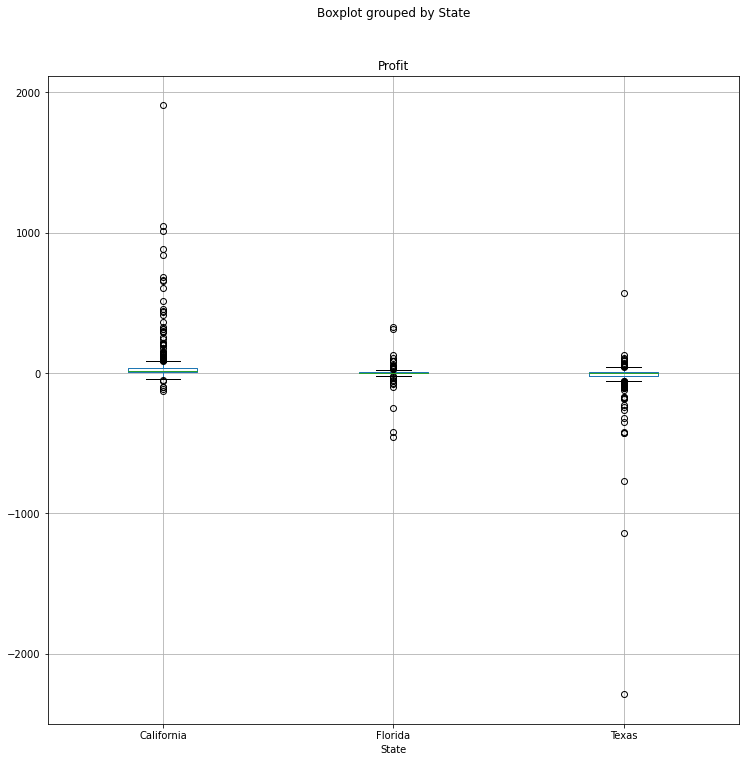

In [ ]:
# To measure how the States performed during this e-commerce, a boxplot was analyzed

data_box = data.loc[data["State"].isin(["Texas", "Florida", "California"])]

data_box.boxplot(by = "State", column = ["Profit"], figsize = (12,12))

The boxplot shows that during the 2020 covid-19 in US,  profits were distributed between the states of California, florida and texas in a manner that shows that California has the largest profit, followed by Florida and Texas.

In [ ]:
# Final Thoughts

# This Capstone research shows that for both the datasets (US e-commerce covid 2020 and county_wise_covid-19), The effect of the covid-19 cases and deaths were significant. Although a statistically significant relationship exists between e-commerce Sales and Profits in different regions and States, the impact of confirmed cases and deaths showed a correlational trend. Other variables like category of goods was driving Sales and profit. 

# The Pearson correlation between Sales and Profits was moderately strong and clinically significant at p< 0.05. As a result, the null hypothesis was rejected: There is no difference in relationship that exists between e-commerce sales and profits in different US regions during the 2020 covid-19.The study showed that most US-ecommerce were not strongly affected by the covid-19 in 2020.


# This study will help Stakeholders, Organizational leaders in both public and private to continue using data in making quality driven decisions. It is true that while most people were indoors, ecommerce blossomed resulting in the closure of some stores like Macy's. Re-inventing business strategies is key to being relevant in having a successful business. 


# Next Steps/ Further Study:  I will suggest that future studies should find out what happened in New York that made them the leading State in both confirmed cases and deaths of covid-19 cases. How those factors relates to ecommerce in the state will be helpful in averting furture pandemic catastrophies.